In [61]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
from rasterio.plot import show
import numpy as np

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 57856, 'height': 19456, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(305.748113140705, 0.0, -1956787.9241005108,
       0.0, -305.748113140705, 4696291.017841229), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


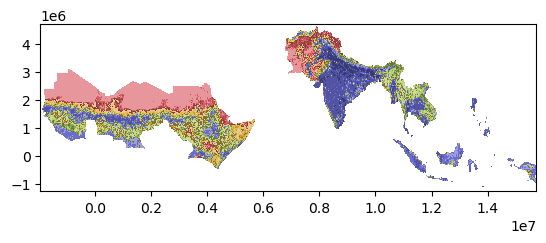

Text(0.5, 1.0, 'AOI')

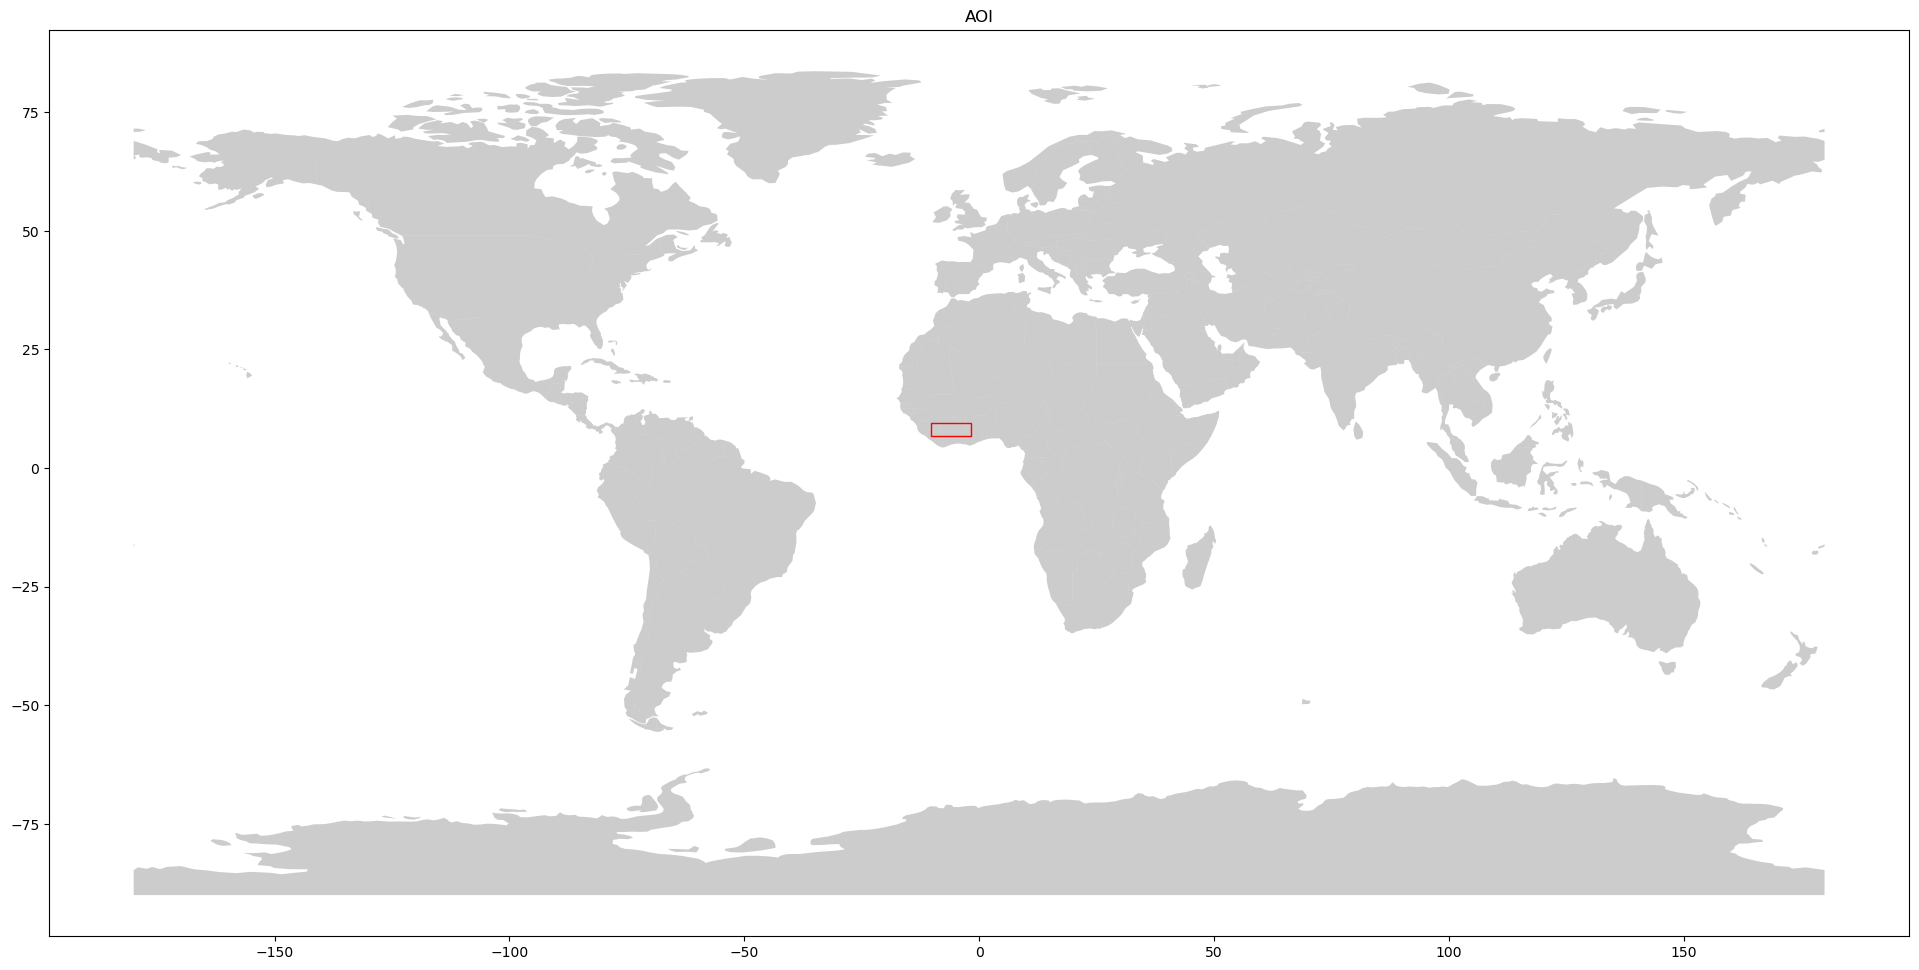

In [36]:
# Step 1: Load the raster
raster_file = "../../data/processed/globcover_cog_test.tif"

with rasterio.open(raster_file) as src:
    print(src.profile)
    show(src, cmap='tab20b')
# Step 2: Load the geometry
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geometry = '{"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"coordinates":[[[-1.8060455852562995,9.498807619361628],[-10.322169919595439,9.498807619361628],[-10.322169919595439,6.736927569643058],[-1.8060455852562995,6.736927569643058],[-1.8060455852562995,9.498807619361628]]],"type":"Polygon"}}]}'
geometry = gpd.read_file(geometry, driver='GeoJSON')

fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geometry.plot(ax=ax, legend=True, edgecolor="red", facecolor="none")
plt.title("AOI")

In [56]:
mapping = {
11: "Post-flooding or irrigated croplands (or aquatic)",
14: "Rainfed croplands",
20: "Mosaic cropland (50-70%) / vegetation (grassland/shrubland/forest) (20-50%)",
30:" Mosaic vegetation (grassland/shrubland/forest) (50-70%) / cropland (20-50%)",
40: "Closed to open (>15%) broadleaved evergreen or semi-deciduous forest (>5m)",
50: "Closed (>40%) broadleaved deciduous forest (>5m)",
60: "Open (15-40%) broadleaved deciduous forest/woodland (>5m)",
70: "(>40%) needleleaved evergreen forest (>5m)",
90: "Open (15-40%) needleleaved deciduous or evergreen forest (>5m)",
100: "Closed to open (>15%) mixed broadleaved and needleleaved forest (>5m)",
110: "Mosaic forest or shrubland (50-70%) / grassland (20-50%)",
120: "Mosaic grassland (50-70%) / forest or shrubland (20-50%)",
130: "Closed to open (>15%) (broadleaved or needleleaved, evergreen or deciduous) shrubland (<5m)",
140: "Closed to open (>15%) herbaceous vegetation (grassland, savannas or lichens/mosses)",
150: "Sparse (<15%) vegetation",
160: "Closed to open (>15%) broadleaved forest regularly flooded (semi-permanently or temporarily) - Fresh or brackish water",
170: "Closed (>40%) broadleaved forest or shrubland permanently flooded - Saline or brackish water",
180: "Closed to open (>15%) grassland or woody vegetation on regularly flooded or waterlogged soil - Fresh, brackish or saline water",
190: "Artificial surfaces and associated areas (Urban areas >50%)",
200: "Bare areas",
210: "Water bodies",
220: "Permanent snow and ice",
230: "No data (burnt areas, clouds,…)"
}

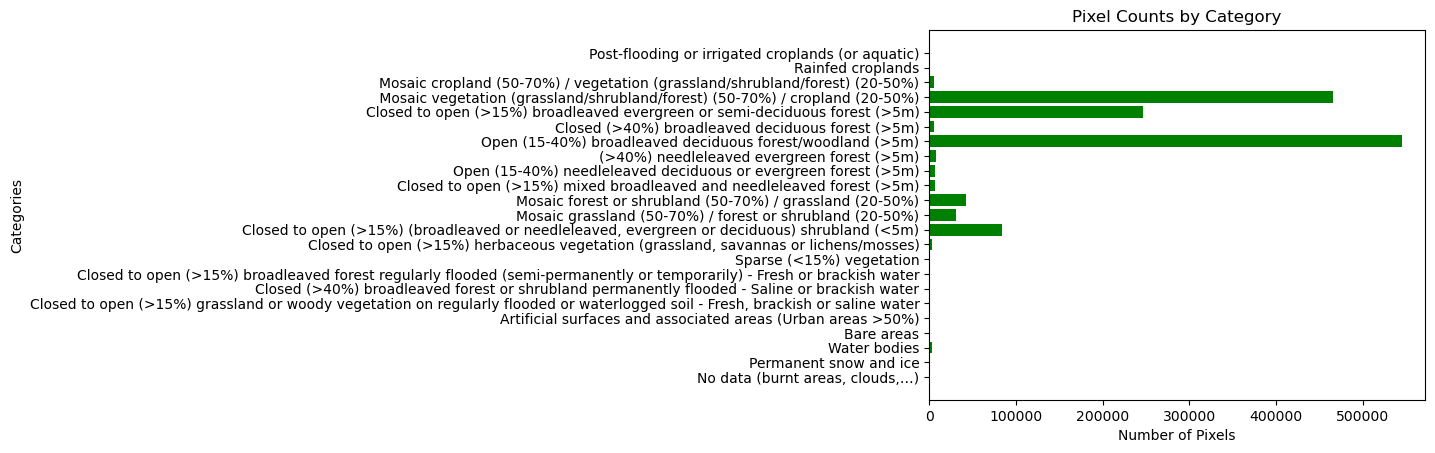

In [75]:
# Step 3: Intersect the raster with the geometry
stats = zonal_stats(vectors=geometry.to_crs(3857)['geometry'], raster=raster_file, categorical=True)

# Step 4: Calculate the count of pixels in each category
pixel_counts = {}
for stat in stats:
    for key, value in stat.items():
        if key in mapping.keys():
            if key in pixel_counts:
                pixel_counts[int(key)] += value
            else:
                pixel_counts[int(key)] = value

# Step 5: Generate a bar chart with the categorical output of the intersection
plt.rcdefaults() 
fig, ax = plt.subplots()
y_pos = np.arange(len(pixel_counts.keys()))
ax.barh(list(mapping.values()),pixel_counts.values(), align='center',
        color='green', ecolor='black')

ax.invert_yaxis()
plt.ylabel('Categories')
plt.xlabel('Number of Pixels')
plt.title('Pixel Counts by Category')
plt.show()